In [60]:
import torch

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from misc import simple_regret, get_problem_settings, bin_mean_cost, set_matplotlib_params

In [61]:
env = "hartmann"
algo = "mes"
kernels = ["downsampled","lin"]
budget = 100
bins = 60

In [62]:
data = torch.load("./results_exp_"+env+"_sf"+algo+"_"+kernels[0]+"/exp_"+env+"_sf"+algo+"_"+kernels[0]+"_results.pt")
li = [torch.clamp(x[0],0).cpu() for x in data]
mu11,sigma11,bins11 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

In [63]:
data = torch.load("./results_exp_"+env+"_sf"+algo+"_"+kernels[1]+"/exp_"+env+"_sf"+algo+"_"+kernels[1]+"_results.pt")
li = [torch.clamp(x[0],0).cpu() for x in data]
mu12,sigma12,bins12 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

In [64]:
data = torch.load("./results_exp_"+env+"_mf"+algo+"_"+kernels[0]+"/exp_"+env+"_mf"+algo+"_"+kernels[0]+"_results.pt")
li = [torch.clamp(x[0],0).cpu() for x in data]
mu21,sigma21,bins21 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

In [65]:
data = torch.load("./results_exp_"+env+"_mf"+algo+"_"+kernels[1]+"/exp_"+env+"_mf"+algo+"_"+kernels[1]+"_results.pt")
li = [torch.clamp(x[0],0).cpu() for x in data]
mu22,sigma22,bins22 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

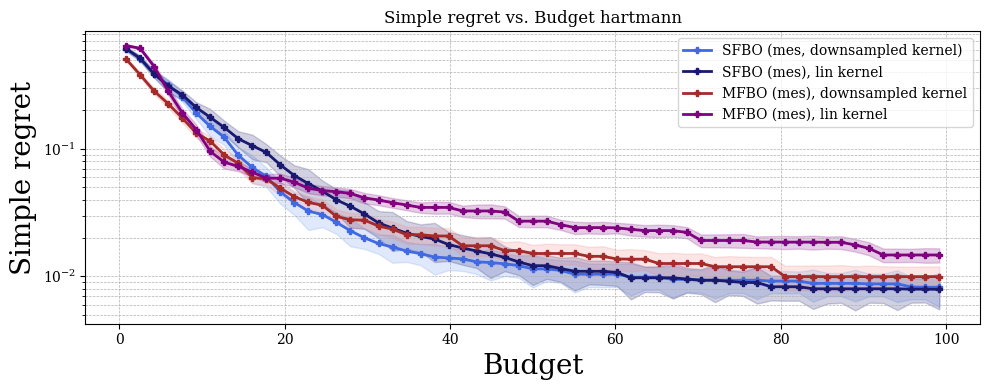

In [67]:
plt.figure(figsize=(10, 4))
plt.rc('font', family='serif')

plt.plot(bins11, mu11, '-P', color='royalblue', linewidth=2, markersize=4, label=f"SFBO ({algo}, {kernels[0]} kernel)")
plt.plot(bins12, mu12, '-P', color='midnightblue', linewidth=2, markersize=4, label=f"SFBO ({algo}), {kernels[1]} kernel")
plt.plot(bins21, mu21, '-P', color='brown', linewidth=2, markersize=4, label=f"MFBO ({algo}), {kernels[0]} kernel")
plt.plot(bins22, mu22, '-P', color='purple', linewidth=2, markersize=4, label=f"MFBO ({algo}), {kernels[1]} kernel")

plt.fill_between(bins11, 
                 [float(regret - std) for regret, std in zip(mu11, sigma11)], 
                 [float(regret + std) for regret, std in zip(mu11, sigma11)], 
                 color='cornflowerblue', alpha=0.2)
plt.fill_between(bins12, 
                 [float(regret - std) for regret, std in zip(mu12, sigma12)], 
                 [float(regret + std) for regret, std in zip(mu12, sigma12)], 
                 color='midnightblue', alpha=0.2)

plt.fill_between(bins21, 
                 [float(regret - std) for regret, std in zip(mu21, sigma21)], 
                 [float(regret + std) for regret, std in zip(mu21, sigma21)], 
                 color='lightcoral', alpha=0.2)
plt.fill_between(bins22, 
                 [float(regret - std) for regret, std in zip(mu22, sigma22)], 
                 [float(regret + std) for regret, std in zip(mu22, sigma22)], 
                 color='purple', alpha=0.2)

plt.xlabel("Budget", fontsize=20)
plt.ylabel("Simple regret", fontsize=20)
plt.yscale("log")

plt.title("Simple regret vs. Budget "+env)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()